In [1]:
import requests
import json

from api_keys import api_key
# jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000

url = "https://developer.nps.gov/api/v1/parks"

param = {
    "api_key":api_key,
    "limit":500
    }

response = requests.get(url, params = param)
json_response = response.json()
print(json.dumps(json_response, indent=4))


{
    "total": "468",
    "limit": "500",
    "start": "0",
    "data": [
        {
            "id": "77E0D7F0-1942-494A-ACE2-9004D2BDC59E",
            "url": "https://www.nps.gov/abli/index.htm",
            "fullName": "Abraham Lincoln Birthplace National Historical Park",
            "parkCode": "abli",
            "description": "For over a century people from around the world have come to rural Central Kentucky to honor the humble beginnings of our 16th president, Abraham Lincoln. His early life on Kentucky's frontier shaped his character and prepared him to lead the nation through Civil War. The country's first memorial to Lincoln, built with donations from young and old, enshrines the symbolic birthplace cabin.",
            "latitude": "37.5858662",
            "longitude": "-85.67330523",
            "latLong": "lat:37.5858662, long:-85.67330523",
            "activities": [
                {
                    "id": "13A57703-BB1A-41A2-94B8-53B692EB7238",
                 

In [2]:
import pandas as pd
import pprint 

# print(len(json_response['data']))cbgn
# print(json_response['data'][])

nps_api_df = pd.DataFrame(columns=['parkCode','fullName','latitude','longitude','state','address','cost'])

i=0

for park in json_response['data']:
    
#     print(park['parkCode'])   
#     print(park['states'])
    try:
        park_address = f"{park['addresses'][0]['line1']}{park['addresses'][0]['city']}-{park['addresses'][0]['postalCode']}"
    except:
        park_address = ""
        
    try:
        entrance_fee_cost = park['entranceFees'][0]['cost']
    except:
        entrance_fee_cost = 0
        
    try:
        state = park['addresses'][0]['stateCode']
        
    except:
        try:
            state = park['states'].split(',')[0]    
        except:
            state=""
        
#     print(f"state:{state}")
#     print('---------')
#     print(park_address)
    nps_api_df = nps_api_df.append({
        'parkCode':park['parkCode'].upper(),
        'fullName':park['fullName'],
        'latitude':park['latitude'],
        'longitude':park['longitude'],
        'state':state,
        'address':park_address,
        'cost':entrance_fee_cost
    },ignore_index=True)

In [3]:
nps_api_df

parkCode                                           fullName     latitude  \
0       ABLI  Abraham Lincoln Birthplace National Historical...   37.5858662   
1       ACAD                               Acadia National Park    44.409286   
2       ADAM                     Adams National Historical Park   42.2553961   
3       AFAM                African American Civil War Memorial      38.9166   
4       AFBG            African Burial Ground National Monument  40.71452681   
..       ...                                                ...          ...   
463     YORK  Yorktown Battlefield Part of Colonial National...      37.2195   
464     YOSE                             Yosemite National Park  37.84883288   
465     YUHO                      Yucca House National Monument  37.24778944   
466     YUCH           Yukon - Charley Rivers National Preserve   65.0935608   
467     ZION                                 Zion National Park  37.29839254   

        longitude state                                            address  \
0    -85.67330523    KY            2995 Lincoln Farm RoadHodgenville-42748   
1      -68.247501    ME             25 Visitor Center RoadBar Harbor-04609   
2    -71.01160356    MA                    1250 Hancock StreetQuincy-02169   
3         -77.026    DC      1925 Vermont Avenue NorthwestWashington-20001   
4    -74.00447358    NY  African Burial Ground National MonumentNew Yor...   
..            ...   ...                                                ...   
463      -76.4983    VA                 Yorktown BattlefieldYorktown-23690   
464  -119.5571873    CA                                                      
465  -108.6861274    CO                     Off County Rd 20.5Cortez-81321   
466  -142.7960021    AK                       101 Dunkel StFairbanks-99701   
467  -113.0265138    UT                 Zion National ParkSpringdale-84767   

      cost  
0     0.00  
1    30.00  
2    15.00  
3     0.00  
4     0.00  
..     ...  
463   0.00  
464  35.00  
465   0.00  
466   0.00  
467  35.00  

[468 rows x 7 columns]

In [4]:
# file_path = "../WeatherPy/output_data/cities.csv"

# cities_df = pd.read_csv(file_path)
# cities_df

file_path="Data_Resources/park_type_and_region.csv"

parktype_df = pd.read_csv(file_path)
parktype_df

file_path="Data_Resources/StateNameList.csv"

state_df = pd.read_csv(file_path)
state_df


state                      state_name
0     AL                         Alabama
1     AK                          Alaska
2     AZ                         Arizona
3     AR                        Arkansas
4     CA                      California
5     CO                        Colorado
6     CT                     Connecticut
7     DE                        Delaware
8     DC            District of Columbia
9     FL                         Florida
10    GA                         Georgia
11    HI                          Hawaii
12    ID                           Idaho
13    IL                        Illinois
14    IN                         Indiana
15    IA                            Iowa
16    KS                          Kansas
17    KY                        Kentucky
18    LA                       Louisiana
19    ME                           Maine
20    MD                        Maryland
21    MA                   Massachusetts
22    MI                        Michigan
23    MN                       Minnesota
24    MS                     Mississippi
25    MO                        Missouri
26    MT                         Montana
27    NE                        Nebraska
28    NV                          Nevada
29    NH                   New Hampshire
30    NJ                      New Jersey
31    NM                      New Mexico
32    NY                        New York
33    NC                  North Carolina
34    ND                    North Dakota
35    OH                            Ohio
36    OK                        Oklahoma
37    OR                          Oregon
38    PA                    Pennsylvania
39    RI                    Rhode Island
40    SC                  South Carolina
41    SD                    South Dakota
42    TN                       Tennessee
43    TX                           Texas
44    UT                            Utah
45    VT                         Vermont
46    VA                        Virginia
47    WA                      Washington
48    WV                   West Virginia
49    WI                       Wisconsin
50    WY                         Wyoming
51    AS                  American Samoa
52    FM  Federated States of Micronesia
53    GU                            Guam
54    MH                Marshall Islands
55    MP               Northern Marianas
56    PW                           Palau
57    PR                     Puerto Rico
58    VI                  Virgin Islands

In [5]:
park_df = pd.merge(nps_api_df, parktype_df, on="parkCode", how='left')
park_df

data_df = pd.merge(park_df,state_df, on='state', how='left')
data_df

parkCode                                           fullName     latitude  \
0       ABLI  Abraham Lincoln Birthplace National Historical...   37.5858662   
1       ACAD                               Acadia National Park    44.409286   
2       ADAM                     Adams National Historical Park   42.2553961   
3       AFAM                African American Civil War Memorial      38.9166   
4       AFBG            African Burial Ground National Monument  40.71452681   
..       ...                                                ...          ...   
463     YORK  Yorktown Battlefield Part of Colonial National...      37.2195   
464     YOSE                             Yosemite National Park  37.84883288   
465     YUHO                      Yucca House National Monument  37.24778944   
466     YUCH           Yukon - Charley Rivers National Preserve   65.0935608   
467     ZION                                 Zion National Park  37.29839254   

        longitude state                                            address  \
0    -85.67330523    KY            2995 Lincoln Farm RoadHodgenville-42748   
1      -68.247501    ME             25 Visitor Center RoadBar Harbor-04609   
2    -71.01160356    MA                    1250 Hancock StreetQuincy-02169   
3         -77.026    DC      1925 Vermont Avenue NorthwestWashington-20001   
4    -74.00447358    NY  African Burial Ground National MonumentNew Yor...   
..            ...   ...                                                ...   
463      -76.4983    VA                 Yorktown BattlefieldYorktown-23690   
464  -119.5571873    CA                                                      
465  -108.6861274    CO                     Off County Rd 20.5Cortez-81321   
466  -142.7960021    AK                       101 Dunkel StFairbanks-99701   
467  -113.0265138    UT                 Zion National ParkSpringdale-84767   

      cost                  parkType          Region            state_name  
0     0.00  National Historical Park      Southeast               Kentucky  
1    30.00             National Park      Northeast                  Maine  
2    15.00  National Historical Park      Northeast          Massachusetts  
3     0.00                       NaN             NaN  District of Columbia  
4     0.00         National Monument      Northeast               New York  
..     ...                       ...             ...                   ...  
463   0.00                       NaN             NaN              Virginia  
464  35.00             National Park   Pacific West             California  
465   0.00                       NaN             NaN              Colorado  
466   0.00         National Preserve          Alaska                Alaska  
467  35.00             National Park  Intermountain                   Utah  

[468 rows x 10 columns]

In [6]:


# x_axis = np.arange(len(new_df))
# tick_locations = [value+0.4 for value in x_axis]

# plt.figure(figsize=(20,3))
# plt.bar(x_axis, new_df["parkType"], color='r', alpha=0.5, align="edge")
# # plt.xticks(tick_locations, new_df["state"], rotation="vertical")

# plt.xlim(-0.25, len(x_axis))
# plt.ylim(0, count(new_df["parkType"]).count())

# plt.title("Average Rain per State")
# plt.xlabel("State")
# plt.ylabel("Average Amount of Rainfall in Inches")

# # Save our graph and show the grap
# plt.tight_layout()
# # plt.savefig("./Images/avg_state_rain.png")
# plt.show()

# plt.bar(new_df["state"], new_df["parkType"], color='b', alpha=1, align="center")

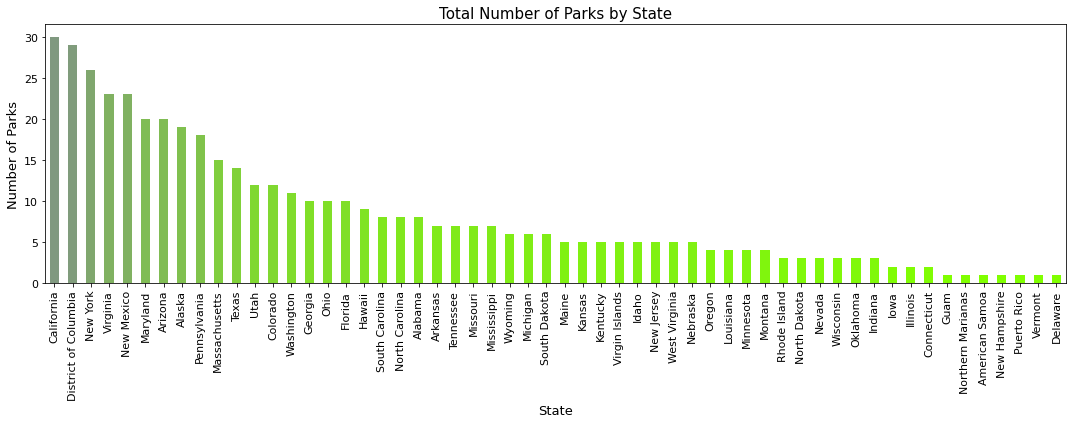

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle, islice
import matplotlib as mp

park_by_state_df = data_df["state_name"].value_counts()

fig = plt.figure(figsize=(15,6))

# ax1 = plt.axes()
# ax1.set_facecolor("ivory")

likeability_scores = np.array(park_by_state_df)
data_normalizer = mp.colors.Normalize()
color_map = mp.colors.LinearSegmentedColormap(
    "my_map",
    {
        "red": [(0, 1.0, 0.5),(1.0, 0.5, 0.5)],
        "green": [(0, 1, 1),(1.0, 0.6, 1)],
        "blue": [(0, 0, 0),(1.0, 0.5, 0.5)]
    }
)

# x_axis = np.arange(len(park_by_state_df))
# tick_locations = [value+0.4 for value in x_axis]
# plt.xticks(tick_locations, park_by_state_df, rotation="vertical")

park_by_state_df.plot(kind="bar", rot=90, fontsize=11, color=color_map(data_normalizer(likeability_scores)))


plt.xlabel('State',fontsize=13)
plt.ylabel('Number of Parks',fontsize=13)
plt.title('Total Number of Parks by State', fontsize=15)

plt.tight_layout()
plt.show()

fig.savefig('Park_by_State.png')

In [109]:
file_path="Data_Resources/Annual Visitation By Park (1979 - Last Calendar Year).xlsx"

annual_visitation_df = pd.read_excel(file_path)
annual_visitation_df

parkCode                       Park Name       2010       2011       2012  \
0       ABLI  Abraham Lincoln Birthplace NHP   177122.0   163568.0   169515.0   
1       ACAD                       Acadia NP  2504208.0  2374645.0  2431052.0   
2       ADAM                       Adams NHP    73339.0   219975.0   336031.0   
3       AFBG        African Burial Ground NM   117113.0   108585.0    77624.0   
4       AGFO            Agate Fossil Beds NM    12509.0    11617.0    11824.0   
..       ...                             ...        ...        ...        ...   
374     WUPA                      Wupatki NM   221083.0   216165.0   201365.0   
375     YELL                  Yellowstone NP  3640185.0  3394326.0  3447729.0   
376     YOSE                     Yosemite NP  3901408.0  3951393.0  3853404.0   
377     YUCH      Yukon-Charley Rivers NPRES     6211.0     1718.0     1393.0   
378     ZION                         Zion NP  2665972.0  2825505.0  2973607.0   

          2013       2014       2015       2016     2017     2018     2019  \
0     163928.0   241264.0   148605.0   252495.0   269580   260964   238226   
1    2254922.0  2563129.0  2811184.0  3303393.0  3509271  3537575  3437286   
2     285501.0   178468.0   183632.0   199301.0   255562   121007   187400   
3      93234.0    54861.0    56348.0    46526.0    43182    45035    47427   
4      10504.0    12440.0    13264.0    15555.0    32038    16238    16657   
..         ...        ...        ...        ...      ...      ...      ...   
374   190878.0   195962.0   212828.0   223172.0   236454   205122   187059   
375  3188030.0  3513484.0  4097710.0  4257177.0  4116524  4115000  4020288   
376  3691191.0  3882642.0  4150217.0  5028868.0  4336890  4009436  4422861   
377     3914.0     2329.0     1133.0     1146.0      952     1272     1114   
378  2807387.0  3189696.0  3648846.0  4295127.0  4504812  4320033  4488268   

       Average  
0     208526.7  
1    2872666.5  
2     204021.6  
3      68993.5  
4      15264.6  
..         ...  
374   209008.8  
375  3779045.3  
376  4122831.0  
377     2118.2  
378  3571925.3  

[379 rows x 13 columns]

In [110]:
park_region_df = data_df.copy()

park_region_df["parkType"].fillna("Unknown", inplace = True)
park_region_df["Region"].fillna("Unknown", inplace = True)

park_region_df
# data_df.isna().sum()
# parkCode        0
# fullName        0
# latitude        0
# longitude       0
# state           0
# address         0
# cost            0
# parkType      102
# Region        102
# state_name      0

parkCode                                           fullName     latitude  \
0       ABLI  Abraham Lincoln Birthplace National Historical...   37.5858662   
1       ACAD                               Acadia National Park    44.409286   
2       ADAM                     Adams National Historical Park   42.2553961   
3       AFAM                African American Civil War Memorial      38.9166   
4       AFBG            African Burial Ground National Monument  40.71452681   
..       ...                                                ...          ...   
463     YORK  Yorktown Battlefield Part of Colonial National...      37.2195   
464     YOSE                             Yosemite National Park  37.84883288   
465     YUHO                      Yucca House National Monument  37.24778944   
466     YUCH           Yukon - Charley Rivers National Preserve   65.0935608   
467     ZION                                 Zion National Park  37.29839254   

        longitude state                                            address  \
0    -85.67330523    KY            2995 Lincoln Farm RoadHodgenville-42748   
1      -68.247501    ME             25 Visitor Center RoadBar Harbor-04609   
2    -71.01160356    MA                    1250 Hancock StreetQuincy-02169   
3         -77.026    DC      1925 Vermont Avenue NorthwestWashington-20001   
4    -74.00447358    NY  African Burial Ground National MonumentNew Yor...   
..            ...   ...                                                ...   
463      -76.4983    VA                 Yorktown BattlefieldYorktown-23690   
464  -119.5571873    CA                                                      
465  -108.6861274    CO                     Off County Rd 20.5Cortez-81321   
466  -142.7960021    AK                       101 Dunkel StFairbanks-99701   
467  -113.0265138    UT                 Zion National ParkSpringdale-84767   

      cost                  parkType          Region            state_name  
0     0.00  National Historical Park      Southeast               Kentucky  
1    30.00             National Park      Northeast                  Maine  
2    15.00  National Historical Park      Northeast          Massachusetts  
3     0.00                   Unknown         Unknown  District of Columbia  
4     0.00         National Monument      Northeast               New York  
..     ...                       ...             ...                   ...  
463   0.00                   Unknown         Unknown              Virginia  
464  35.00             National Park   Pacific West             California  
465   0.00                   Unknown         Unknown              Colorado  
466   0.00         National Preserve          Alaska                Alaska  
467  35.00             National Park  Intermountain                   Utah  

[468 rows x 10 columns]

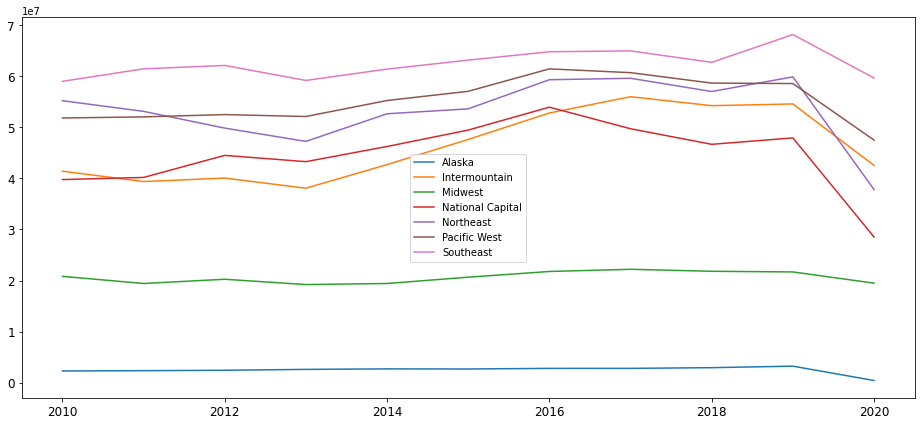

In [127]:
# Multi line chart by region visitation

selected_park_region_df = park_region_df[['parkCode','parkType','Region']]
selected_park_region_df

region_df = pd.merge(annual_visitation_df,selected_park_region_df,on="parkCode", how='left')
region_df

del region_df['Average']

list_2020 = ['406682','42561951','19486819','28524786','37832098','47518887', '59685052']

region_groupby_df = region_df.groupby('Region').sum()
region_2020_df = region_groupby_df.reset_index()

region_2020_df['2020']=list_2020

region_2020_df[2017] = region_2020_df[2017].astype(float)
region_2020_df[2018] = region_2020_df[2018].astype(float)
region_2020_df[2019] = region_2020_df[2019].astype(float)
region_2020_df['2020'] = region_2020_df['2020'].astype(float)

region_chart_df = region_2020_df

region_chart_df.transpose().iloc[1:].rename(columns={
    0: "Alaska",
    1: "Intermountain",
    2: "Midwest",
    3: "National Capital",
    4: "Northeast",
    5: "Pacific West",
    6: "Southeast"
}).plot(kind="line",figsize=(16,7),fontsize=12)

plt.legend(loc='best')

In [79]:
# years_group_df = region_df.groupby('').sum()
# region_df.plot(kind='line')

# region_groupby_df.index.values
# y1 = region_groupby_df
# plt.plot(years, y1, label = "line 1")

# plt.show()
# world_avg, = plt.plot(years, region_groupby_df, color="blue", label="Years" )

# plot lines 
# plt.plot(x, y, label = "line 1") 
# plt.plot(y, x, label = "line 2") 
# plt.plot(x, np.sin(x), label = "curve 1") 
# plt.plot(x, np.cos(x), label = "curve 2") 
# plt.legend() 
# plt.show()


# world_avg, = plt.plot(years, region_df.groupby('Region').sum(), color="blue", label="Years" )


# # Plot the unemployment values for a single country
# # country_one, = plt.plot(years, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014"]], 
# #                         color="green",label=combined_unemployed_data.loc['USA',"Country Name"])
# # Create a legend for our chart
# plt.legend(handles=[world_avg], loc="best")
# # Show the chart
# plt.show()
# region_df.plot(label="World Average")
# # combined_unemployed_data.loc['USA', "2010":"2014"].plot(label="United States")
# plt.legend()
# plt.show()

# df=pd.DataFrame({'x': years, 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21) })
 
# # multiple line plot
# plt.plot( 'x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
# plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
# plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
# plt.legend()
